# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

1. Is the distribution of body temperatures normal?

   * Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

   * Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test

In [2]:
df.info()
df.head()
# df dataset has 130 entries without any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
# calculate the sample mean and sample deviation
sample_mean= df['temperature'].mean()
sample_std = df['temperature'].std()
print("the sample mean is " + str(sample_mean))
print("the sample standard deviation is " + str(sample_std))

the sample mean is 98.24923076923078
the sample standard deviation is 0.7331831580389454


the number of entries with tempature smaller than or equal to the sample mean is : 66
the number of entries with tempature larger than the sample mean is : 64


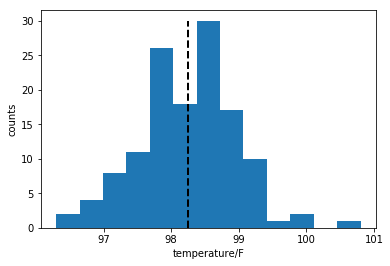

In [4]:
plt.hist(x = df['temperature'], bins = 'auto')
plt.xlabel('temperature/F')
plt.ylabel('counts')

# plot a dashed line representing temperature's sample mean
plt.plot([sample_mean, sample_mean], [0, 30], 'k--', lw=2)

# count the number of entries with tempature smaller than or equal to the sample mean
t_smaller_or_eq_mean = df[df['temperature'] >= sample_mean].count()['temperature']
t_larger_than_mean = 130 - t_smaller_or_eq_mean

print("the number of entries with tempature smaller than or equal to the sample mean is : " 
      + str(t_smaller_or_eq_mean))
print("the number of entries with tempature larger than the sample mean is : " 
      + str(t_larger_than_mean))

Answer to question 1: The distribution of body temperatures is symmetric and normal

2. Is the sample size large? Are the observations independent?

   * Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

Answer to question 2: The sample size = 130 > 30, so it is a large sample size. 
This sample size is far less than 10% of the entire population, therefore the observations are independent.

3. Is the true population mean really 98.6 degrees F?

   * First, try a bootstrap hypothesis test.
   * Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
   * In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?
   * Now try using the other test. How is the result be different? Why?

In [5]:
# bootstrap hypothesis test
# H0: true mean = 98.6, Ha: true mean is not equal to 98.6

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

# Make an array of translated_temp with mean = 98.6
translated_temp = df['temperature'] - np.mean(df['temperature']) + 98.6

# Take bootstrap replicates of translated_temp
bs_replicates = draw_bs_reps(translated_temp, func = np.mean, size = 10000)

# Compute fraction of replicates that are less than the observed temperature mean mean
p = np.sum(bs_replicates <= np.mean(df['temperature'])) / 10000

# Print the p-value
print('bootstrap hypothesis test: p = ', p)
print("Therefore we reject the H0, the true population mean is not 98.6")

bootstrap hypothesis test: p =  0.0
Therefore we reject the H0, the true population mean is not 98.6


In [6]:
# Frequentist statistical testing 
# H0: true mean = 98.6, Ha: true mean is not equal to 98.6
# We use one-sample test as we are not comparing statistics between groups

# As we deal with mean and don't know the population variance, t statistics is approporate
# SE = (98.6-sample_mean)/(sample_std/np.sqrt(130))
SE = sample_std/np.sqrt(130)
degree_of_freedom = 129

p_value_t = 2*(1-stats.t.cdf(SE,degree_of_freedom))

print("the p-value of frequentist statistical testing for t test is: " + str(p_value_t))

# if we use z test instead

p_value_z = 2*(1-stats.norm.cdf(SE))

print("the p-value of frequentist statistical testing for z test is: " + str(p_value_z))
print("Therefore we reject the H0, the true population mean is not 98.6")

the p-value of frequentist statistical testing for t test is: 0.9488273769463869
the p-value of frequentist statistical testing for z test is: 0.9487278366080021
Therefore we reject the H0, the true population mean is not 98.6


Answer to question 3: 
 * H0: true mean = 98.6, Ha: true mean is not equal to 98.6
 * The p value calculated from bootstrap hypothesis testing is 0.0 (<0.05), therefore we reject the null hypothesis and the true population mean is not 98.6.
 * The p value of frequentist statistical testing is 2.41e-07(< 0.05), therefore we reject the null hypothesis and the true population mean is not 98.6.
 * When conducting frequentist statistical testing, we used t statistics since we dealt with mean and population variance is not available.
 * When we used z statistics, we also get the small p value of 4.90e-08(< 0.05). Therefore we reject the null hypothesis. We can use z statistics when having a large sample size(n > 30)

4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
   * Which one is the correct one to use?
   * What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?

In [7]:
# randomly draw a sample of size 10

df_n_10 = df['temperature'].sample(n=10, random_state=42)

# calculate the sample mean and sample deviation of this small sample
sample_mean_n10= df_n_10.mean()
sample_std_n10 = df_n_10.std()

print("the sample(n=10) mean is " + str(sample_mean_n10))
print("the sample(n=10) standard deviation is " + str(sample_std_n10))

# since n=10<30, we should use t statistics
# H0: true mean = 98.6, Ha: true mean is not equal to 98.6
SE_n10 = (98.6-sample_mean_n10)/(sample_std_n10/np.sqrt(10))
degree_of_freedom_n10 = 9

p_value_t_n10 = 2*(1-stats.t.cdf(SE_n10,degree_of_freedom_n10))

print("the p-value of the sample(n=10) for t test is: " + str(p_value_t_n10))

# if we use z test instead
p_value_z_n10 = 2*(1-stats.norm.cdf(SE_n10))

print("the p-value of the sample(n=10) for z test is: " + str(p_value_z_n10))
print("both p-value > 0.05, and we fail to reject the H0")

# both p-value > 0.05 so we fail to reject the H0, 
# the difference between t and z test is due to the small sample size(n<30)
# small sample size leads to the wrong conclusion on the hypothesis test

the sample(n=10) mean is 98.22
the sample(n=10) standard deviation is 0.769992784958983
the p-value of the sample(n=10) for t test is: 0.153046248695619
the p-value of the sample(n=10) for z test is: 0.11861362990253155
both p-value > 0.05, and we fail to reject the H0


5. At what temperature should we consider someone's temperature to be "abnormal"?
   * As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
   * Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [8]:
# calculate the 99% confidence interval from boostrap approach
bs_replicates_1_sample = draw_bs_reps(translated_temp, func = np.mean, size = 1)
cf_interval = np.percentile(bs_replicates, [0.5,99.5])

print("99% confidence interval of bootstrap approach is: " + str(cf_interval))
print("We consider someone's temperature to be abnormal if the temperature is < 98.43 or > 98.76")

# calculate the 99% confidence interval from frequentist approach, t(degree of freedom = 129) = 1.979
low_limit = sample_mean - 1.979*SE
high_limit = sample_mean + 1.979*SE
ci = [low_limit,high_limit]
print("99% confidence interval of frequentist approach is: " + str(ci))
print("We consider someone's temperature to be abnormal if the temperature is < 98.12 or > 98.38")

99% confidence interval of bootstrap approach is: [98.43691538 98.76615769]
We consider someone's temperature to be abnormal if the temperature is < 98.43 or > 98.76
99% confidence interval of frequentist approach is: [98.12197232830859, 98.37648921015297]
We consider someone's temperature to be abnormal if the temperature is < 98.12 or > 98.38


6. Is there a significant difference between males and females in normal temperature?
   * What testing approach did you use and why?
   * Write a story with your conclusion in the context of the original problem.

In [9]:
df_temp_female = df[df['gender'] == 'F'].temperature
df_temp_male = df[df['gender'] == 'M'].temperature
alpha = 0.05

# Two-sample t test between two sample means
# H0: mean_temp_male = mean_temp_female,Ha: mean_temp_male not equal to mean_temp_female
t_statistic, pvalue = stats.ttest_ind(df_temp_female,df_temp_male)
print("p value for two-sample t test = " + str(pvalue))
print("p value <0.05 we reject H0 and suggest " 
      "that mean_temp_male not equal to mean_temp_female.")

p value for two-sample t test = 0.02393188312239561
p value <0.05 we reject H0 and suggest that mean_temp_male not equal to mean_temp_female.


Story: Although the mean normal body temperature was held to be 37C or 98.6F 
for over a hundred year, the tempeture mean of the population is not 98.6F 
(99% confendence interval of [98.43,98.76]). Also there is a 
significant difference in normal temperature between males and females.
